## Regressing up some features
We need to get some stats we can use to correlate with our PID and canalization features. Problem is each of the ECAs' dynamics change with the number of cells. We will regress the dynamics against the number of cells and use the slopes and intercepts as our features.

In [143]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

dyn = pd.read_csv('../data/eca_dynamics.csv', index_col=0)

# Pick an ECA
rule = 110

eca = dyn[dyn['rule'] == rule]
print(eca)

      rule  n_cells  m_attractors  mean_period    var_period  mean_transient  \
1540   110        3             1     1.000000      0.000000        2.000000   
1541   110        4             3     1.666667      0.222222        1.062500   
1542   110        5             1     1.000000      0.000000        3.625000   
1543   110        6             3     6.333333     14.222222        1.250000   
1544   110        7             2     7.500000     42.250000        3.179688   
1545   110        8             6     7.500000     41.250000        2.816406   
1546   110        9            13     5.615385      4.544379        4.074219   
1547   110       10            15     8.733333     53.795556        3.330078   
1548   110       11            13    14.461538    763.171598        6.913086   
1549   110       12            11     8.636364     29.322314       15.394531   
1550   110       13             2   176.000000  30625.000000        9.639038   
1551   110       14            15    22.

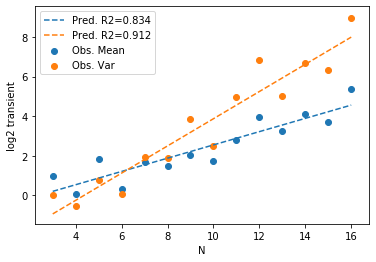

In [146]:
ols_mt = smf.ols('np.log2(mean_transient) ~ n_cells', data=eca).fit()
r2_mt = ols_mt.rsquared

ols_vt = smf.ols('np.log2(var_transient) ~ n_cells', data=eca).fit()
r2_vt = ols_vt.rsquared

fig, ax = plt.subplots()
# mean
ax.scatter(eca['n_cells'], np.log2(eca['mean_transient']), label='Obs. Mean')
ax.plot(eca['n_cells'], ols_mt.predict(eca['n_cells']), label='Pred. R2={:.3f}'.format(r2_mt), linestyle='--')
# var
ax.scatter(eca['n_cells'], np.log2(eca['var_transient']), label='Obs. Var')
ax.plot(eca['n_cells'], ols_vt.predict(eca['n_cells']), label='Pred. R2={:.3f}'.format(r2_vt), linestyle='--')

ax.set_xlabel('N')
ax.set_ylabel('log2 transient')
ax.legend()
plt.show()

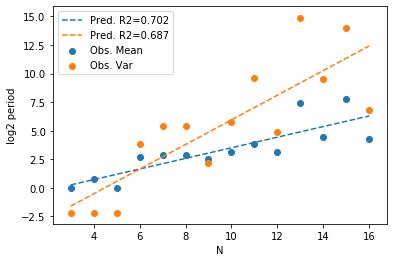

In [147]:
ols_mp = smf.ols('np.log2(mean_period) ~ n_cells', data=eca).fit()
r2_mp = ols_mp.rsquared

# set zeros to the min value
eca['var_period'] = eca['var_period'].replace(0.0, eca[eca['var_period'] > 0]['var_period'].min())

# if the new min is greater than zero do the regression, else nan
if eca['var_period'].min() > 0:
    ols_vp = smf.ols('np.log2(var_period) ~ n_cells', data=eca).fit()
    r2_vp = ols_vp.rsquared
    
    fig, ax = plt.subplots()
    # mean
    ax.scatter(eca['n_cells'], np.log2(eca['mean_period']), label='Obs. Mean')
    ax.plot(eca['n_cells'], ols_mp.predict(eca['n_cells']), label='Pred. R2={:.3f}'.format(r2_mp), linestyle='--')
    # var
    ax.scatter(eca['n_cells'], np.log2(eca['var_period']), label='Obs. Var')
    ax.plot(eca['n_cells'], ols_vp.predict(eca['n_cells']), label='Pred. R2={:.3f}'.format(r2_vp), linestyle='--')
    
    ax.set_xlabel('N')
    ax.set_ylabel('log2 period')
    ax.legend()
    plt.show()
    
    ols_vp.summary()
else:
    print('nope!')

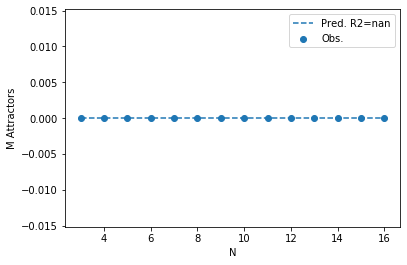

In [115]:
ols_m = smf.ols('np.log2(m_attractors) ~ n_cells', data=eca).fit()
r_m = ols_m.rsquared

fig, ax = plt.subplots()
# mean
ax.scatter(eca['n_cells'], np.log2(eca['m_attractors']), label='Obs.')
ax.plot(eca['n_cells'], ols_m.predict(eca['n_cells']), label='Pred. R2={:.3f}'.format(r2_mp), linestyle='--')

ax.set_xlabel('N')
ax.set_ylabel('M Attractors')
ax.legend()
plt.show()

the slopes will probably do!?!?!

In [131]:
df = pd.read_csv('../data/eca_dynamics_regressed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      256 non-null    int64  
 1   rule            256 non-null    int64  
 2   mean_transient  240 non-null    float64
 3   var_transient   240 non-null    float64
 4   mean_period     256 non-null    float64
 5   var_period      212 non-null    float64
 6   m_attractors    256 non-null    float64
 7   derrida_coeff   256 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 16.1 KB


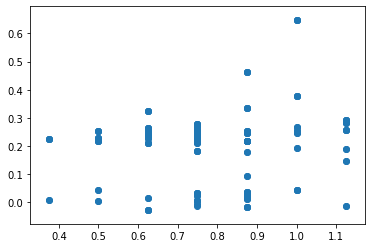

In [142]:
df_clean = df.dropna()

fig, ax = plt.subplots()
ax.scatter(df_clean['derrida_coeff'], df_clean['mean_period'])
plt.show()